In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# load data
df = pd.read_csv("/content/drive/MyDrive/housing.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/housing.csv'

In [ ]:
df.head()

In [ ]:
#get information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
#getting columns names
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
#Getting the shape
df.shape

(20640, 10)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df2=df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]
fig = px.scatter_matrix(df2,
    dimensions=['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'])

fig.update_traces(marker=dict(size=1, line=dict(width=1, color="DarkSlateGrey")))
fig.update_traces(diagonal_visible=False)
fig.show()

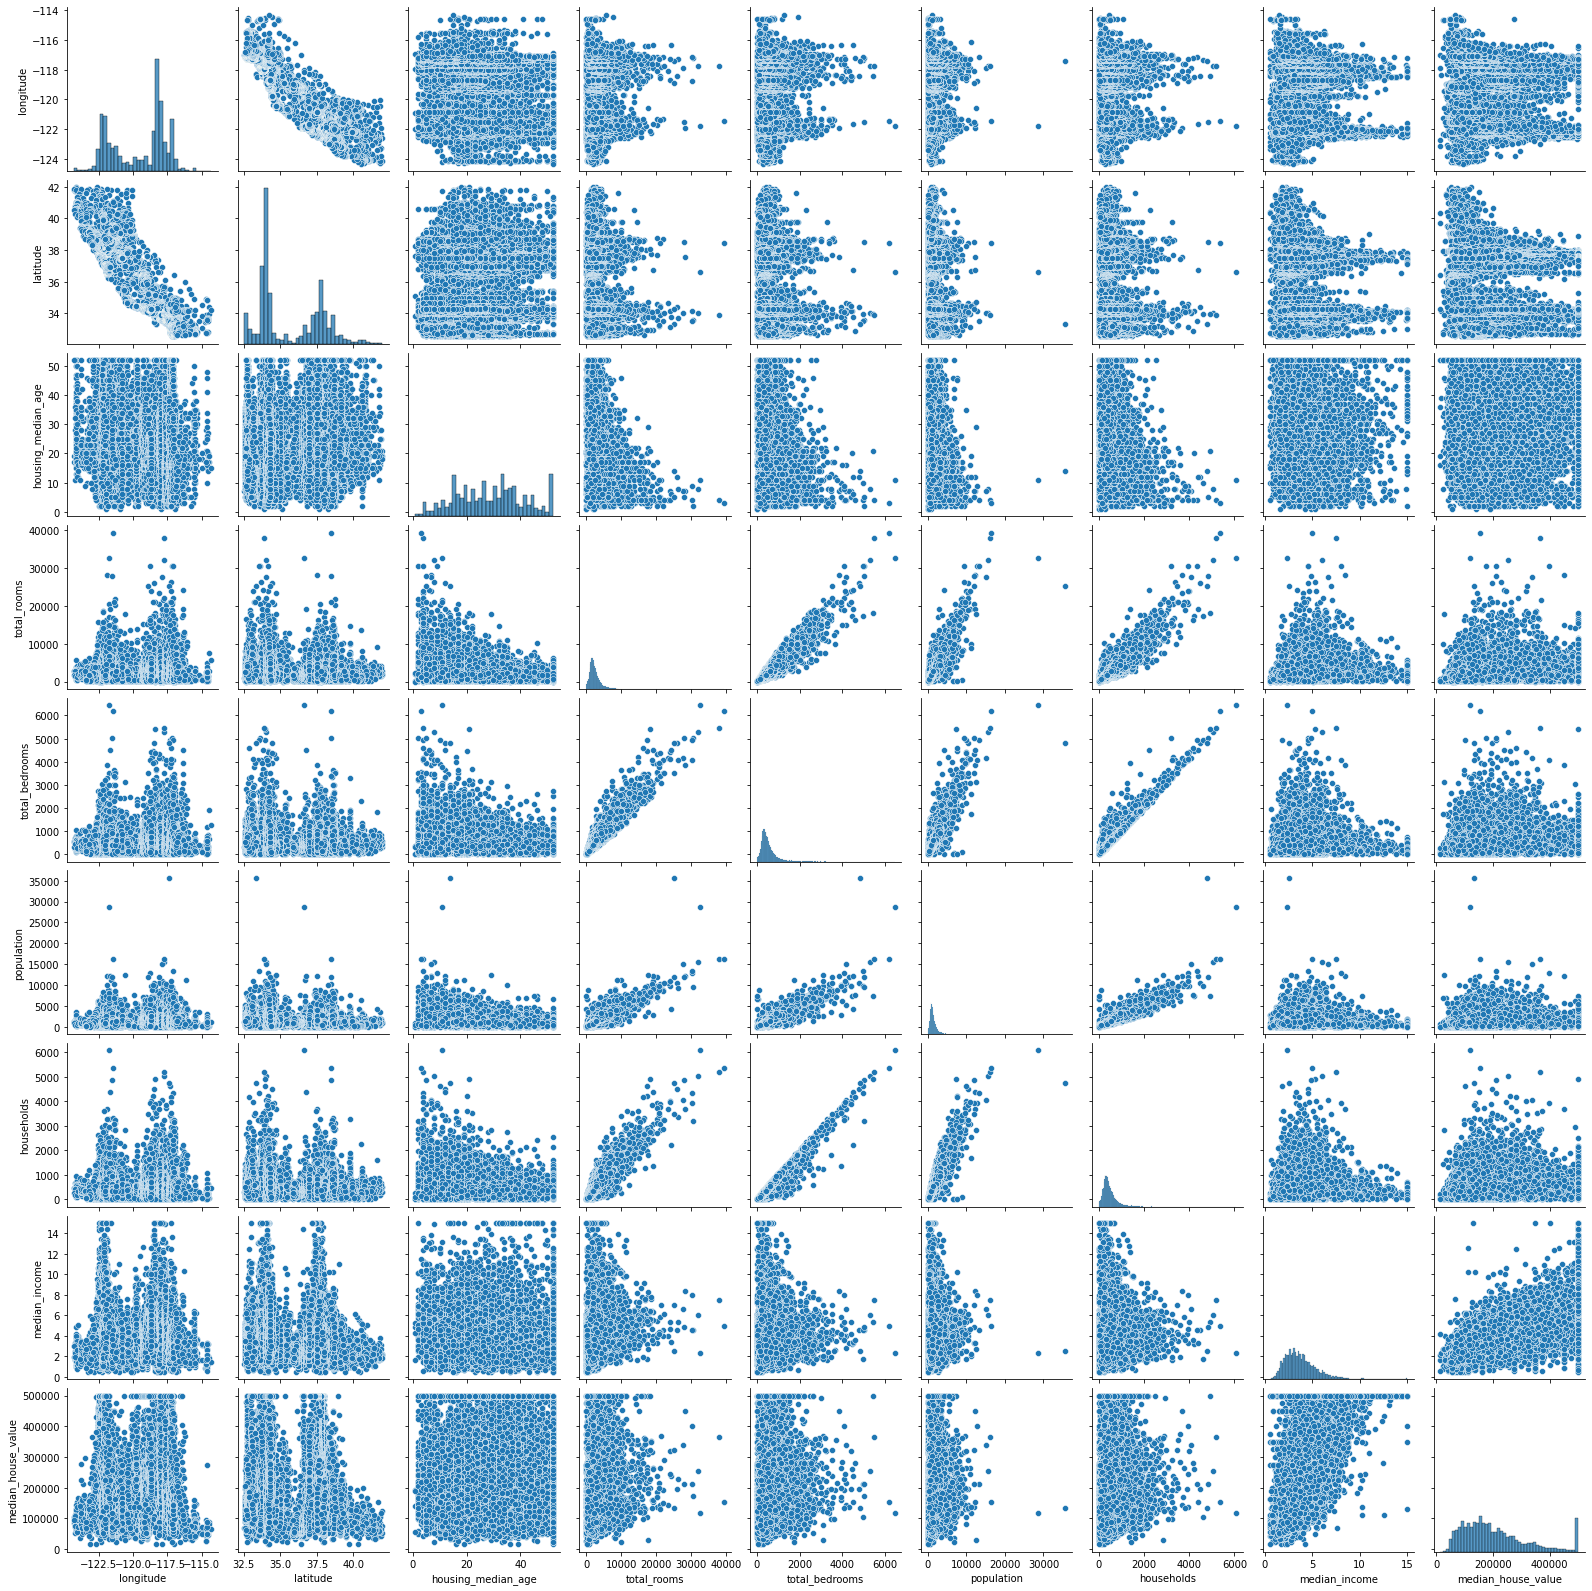

In [ ]:
sns.pairplot(data=df)

### Checking for missing data

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
(round(df.isna().sum() * 100 / df.shape[0], 2)).astype(str) + "%"

longitude             0.0%
latitude              0.0%
housing_median_age    0.0%
total_rooms           0.0%
total_bedrooms        1.0%
population            0.0%
households            0.0%
median_income         0.0%
median_house_value    0.0%
ocean_proximity       0.0%
dtype: object

In [ ]:
# Getting the data that has at least 9 columns valid
df.dropna(thresh = 9,inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Figure size 720x432 with 0 Axes>

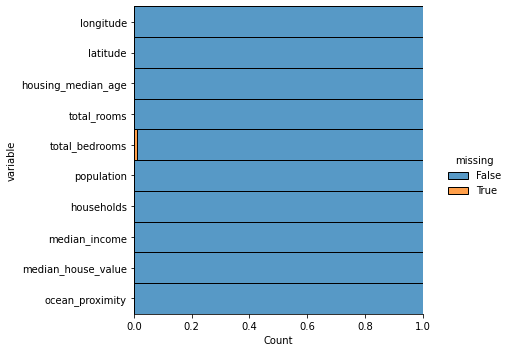

In [ ]:
#Showing missing data
plt.figure(figsize=(10,6));
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
);

### Filling missing data

In [ ]:
# we can fill them by using forward fill
df.total_bedrooms.fillna(method='ffill',inplace=True)

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<a id='Checkingforduplicates'></a>

### Checking for duplicates

In [ ]:
df.duplicated().sum()

0

<a id='Checkingforoutliersandhandelingthem'></a>

### Checking for outliers and handeling them

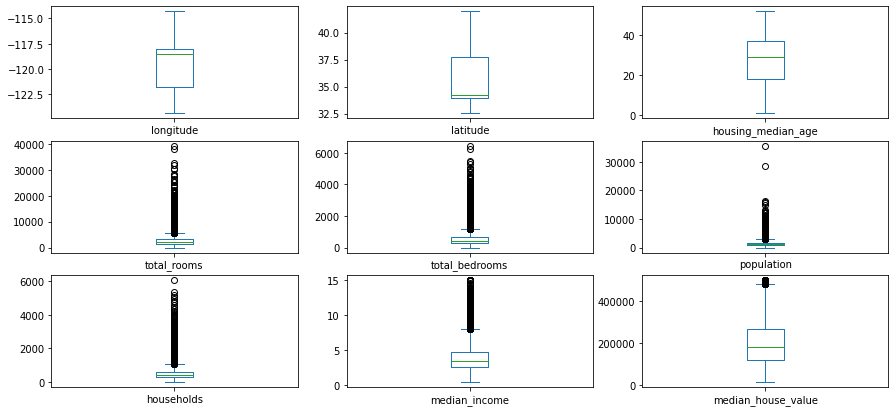

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

In [ ]:
# Most of outlier are important for us so we can remove data bigger than 90% of column
df=df[df['total_rooms']<df['total_rooms'].quantile(0.9)]
df=df[df['total_bedrooms']<df['total_bedrooms'].quantile(0.9)]
df=df[df['population']<df['population'].quantile(0.9)]
df=df[df['households']<df['households'].quantile(0.9)]
df=df[df['median_income']<df['median_income'].quantile(0.9)]


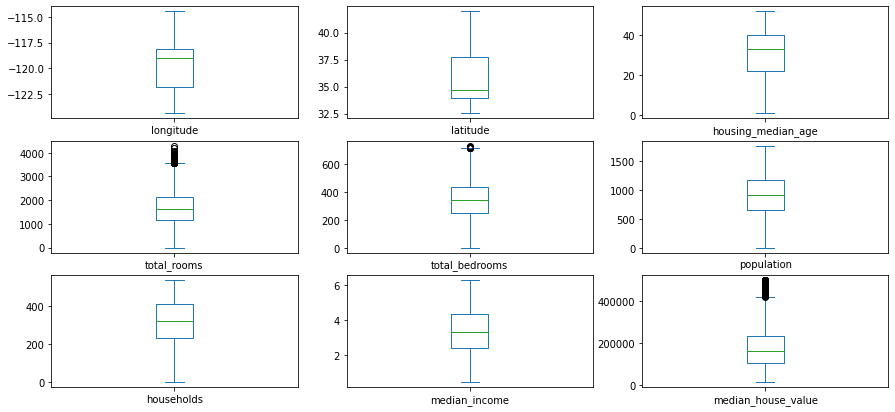

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

<a id='EDA'></a>

### EDA

In [ ]:
# Explore the column ocean_proximity
ocean_values = df["ocean_proximity"].value_counts()
ocean_values

<1H OCEAN     4981
INLAND        4336
NEAR OCEAN    1495
NEAR BAY      1358
ISLAND           5
Name: ocean_proximity, dtype: int64

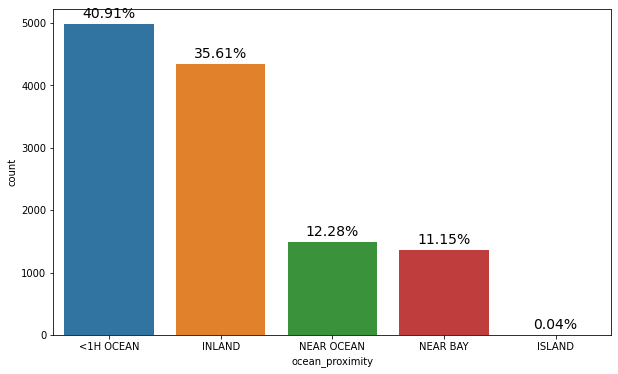

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = "ocean_proximity",data=df,order=ocean_values.index)

# showing the percenotge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    strt='{:0.2f}%'.format(100*count / df.shape[0])
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14)


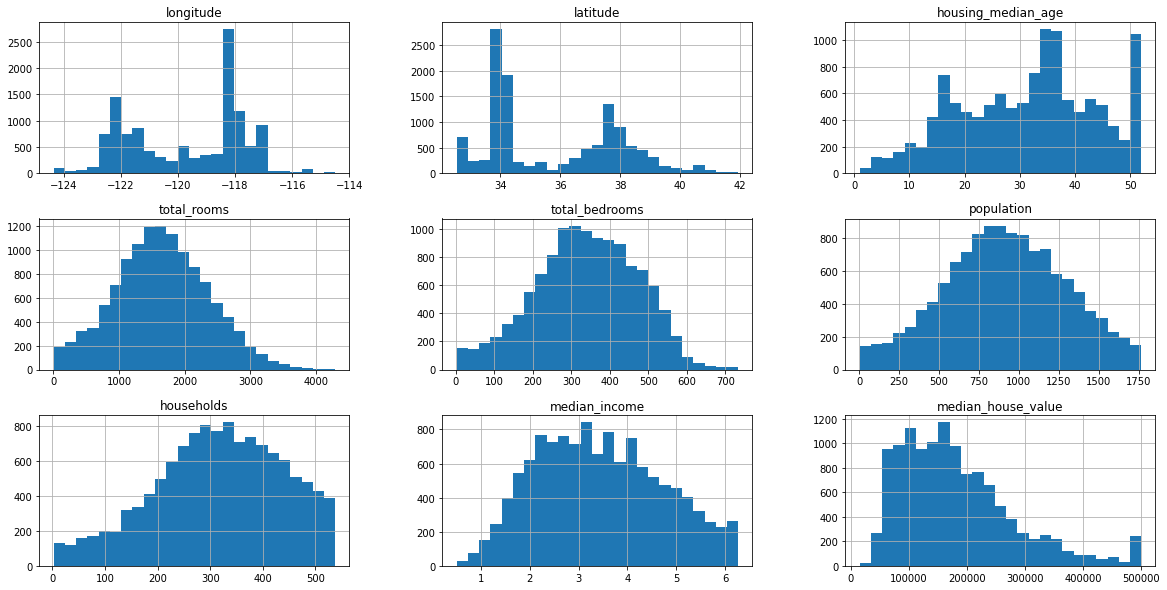

In [ ]:
# Histogram
df.hist(bins=25,figsize=(20,10));

Text(0.5, 1.0, 'Linear correlation Median income/Median House value')

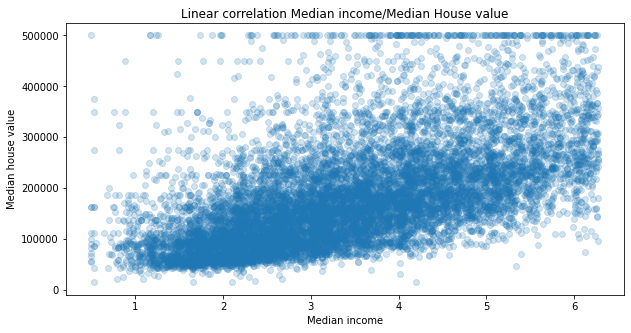

In [ ]:
# check scatter plot between median_income and median_house_value
plt.figure(figsize=(10,5))
plt.scatter(df["median_income"],df["median_house_value"], alpha=0.2)
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.title('Linear correlation Median income/Median House value')

One last thing you may want to do before actually preparing the data for Machine Learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household.

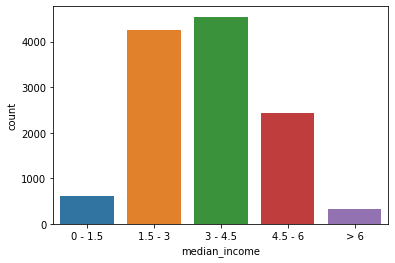

In [ ]:
## Try to make median_income into bins
income_bins = pd.cut(df["median_income"],
                     bins=[0,1.5,3,4.5,6,np.inf],
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])
sns.countplot(x = income_bins);

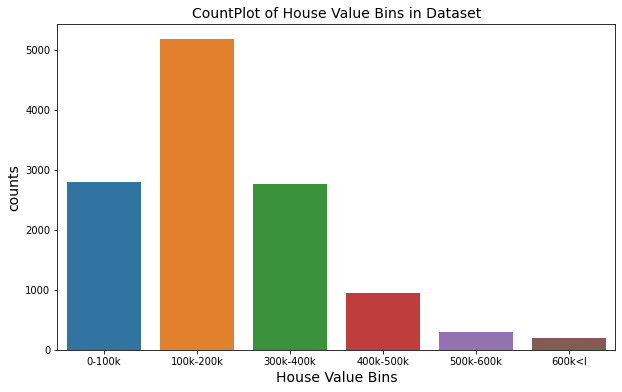

In [ ]:
house_value_bins = pd.cut(x=df["median_house_value"],
                          bins=(-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf),
                                labels=('0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<l') )
## countpLot for the above chunks
plt.figure(figsize=(10,6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('counts', fontsize=14,c='k')
plt.show()

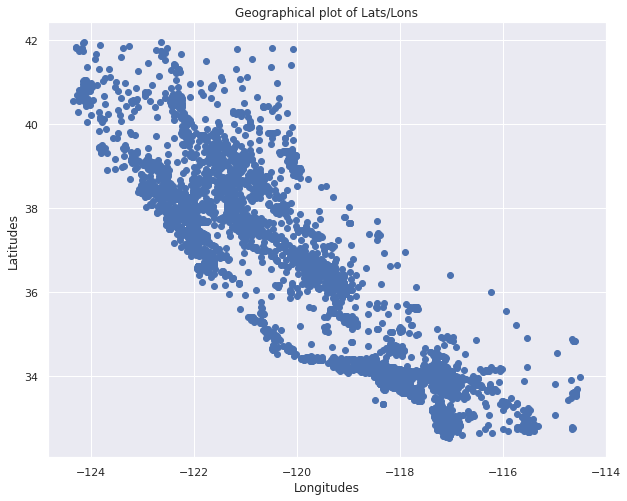

In [ ]:
sns.set()
plt.figure(figsize=(10,8))#Figure size
plt.scatter('longitude','latitude',data=df)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()


Now it's much better , and if we're familiar with Californias map we can see clearly that the high-density areas , namely the Bay Area and all around Los Angeles & San diego More generally our brains can spot patterns visually , but we always need to play around with the vizualisations to make the patterns stands out.

<Figure size 720x504 with 0 Axes>

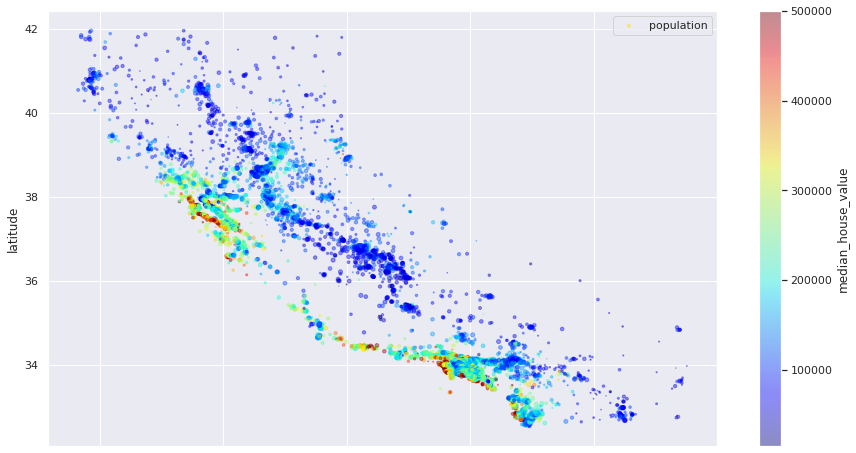

In [ ]:
plt.figure(figsize=(10,7));
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    );
plt.legend();

Now we can say that the house price is a bit related to the location (e.g close to ocean) and to the density of the population.

In [ ]:
import patsy
import folium as folium
from folium import plugins
from folium.plugins import HeatMap
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(california_map)
california_map

<a id='Datasplitting'></a>

### Data Spliting

In [ ]:
df=df[['housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income','median_house_value']]

x = df[['housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income']]

y= df['median_house_value' ]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [ ]:
x_train.shape

(9131, 6)

In [ ]:
y_train.shape

(9131,)

In [ ]:
from sklearn.preprocessing import RobustScaler
ro_scaler=RobustScaler()
x_train=ro_scaler.fit_transform(x_train)
x_test=ro_scaler.fit_transform(x_test)

<a id='VIF'></a>

## VIF

![Variance%20Inflation%20Factors_%20testing%20for%20multicollinearity%20-%20YouTube%20and%203%20more%20pages%20-%20Personal%20-%20Microsoft%E2%80%8B%20Edge%2002_09_2022%2002_30_18%20%D9%85%20%282%29.png](attachment:Variance%20Inflation%20Factors_%20testing%20for%20multicollinearity%20-%20YouTube%20and%203%20more%20pages%20-%20Personal%20-%20Microsoft%E2%80%8B%20Edge%2002_09_2022%2002_30_18%20%D9%85%20%282%29.png)

### source : https://www.youtube.com/watch?v=0SBIXgPVex8&ab_channel=BenLambert

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_x=x.copy()
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_x.values, i)
                          for i in range(len(vif_x.columns))]

print(vif_data)

              feature        VIF
0  housing_median_age   5.502831
1         total_rooms  41.640742
2      total_bedrooms  68.877338
3          population  20.705125
4          households  83.250211
5       median_income   8.236922


### As we can see, total_rooms and total_bedrooms   have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the total_rooms does influence their total_bedrooms. Hence, considering these two features together leads to a model with high multicollinearity.

### median income and population is the same problem

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_x.values, i)
                          for i in range(len(vif_x.columns))]

print(vif_data)

              feature        VIF
0  housing_median_age   5.502831
1         total_rooms  41.640742
2      total_bedrooms  68.877338
3          population  20.705125
4          households  83.250211
5       median_income   8.236922


<a id='LinearRegression'></a>

### Linear Regression

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.score(x_train,y_train)

0.46579054836054734

In [ ]:
reg.score(x_test,y_test)

0.4792176760401037

In [ ]:
reg.intercept_

182677.0563373019

In [ ]:
reg.coef_

array([ 29311.779615  , -58776.83288221,  51169.33041681, -55508.59236933,
        57022.10373245, 107689.75703667])

In [ ]:
d=pd.DataFrame(reg.coef_,x.columns[:],columns=["Coeficient"])
d

,Coeficient
housing_median_age,29311.779615
total_rooms,-58776.832882
total_bedrooms,51169.330417
population,-55508.592369
households,57022.103732
median_income,107689.757037


In [ ]:
y_predict=reg.predict(x_test)

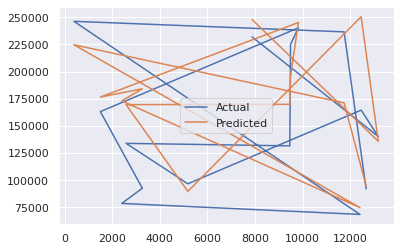

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_predict})
plt.plot(df[:15])
plt.legend(['Actual','Predicted'])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
reg_score = r2_score(y_test , y_predict)
print('R squared of linear regression :',reg_score)

p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
print('Adjacent R squared of linear regression : ',adj_R2)

mape = mean_absolute_percentage_error(y_test , y_predict)
print("Mean  absolute precentage error of linear regression : ",mape*100,'%')

R squared of linear regression : 0.4792176760401037
Adjacent R squared of linear regression :  0.4788752062961581
Mean  absolute precentage error of linear regression :  33.72303222682571 %


<a id='RidgeRegression'></a>

### Ride Regression

In [ ]:
from sklearn import linear_model
reg=linear_model.Ridge(alpha=0.9)

In [ ]:
reg.fit(x_train,y_train)

Ridge(alpha=0.9)

In [ ]:
reg.score(x_train,y_train)

0.4657902243892549

In [ ]:
reg.score(x_test,y_test)

0.47922029738019056

In [ ]:
reg.intercept_

182673.3720205653

In [ ]:
reg.coef_

array([ 29313.68127724, -58602.59730199,  51051.14857124, -55459.80729708,
        56932.77083576, 107609.88752138])

In [ ]:
d=pd.DataFrame(reg.coef_,x.columns[:],columns=["Coeficient"])
d

,Coeficient
housing_median_age,29313.681277
total_rooms,-58602.597302
total_bedrooms,51051.148571
population,-55459.807297
households,56932.770836
median_income,107609.887521


In [ ]:
y_predict2=reg.predict(x_test)

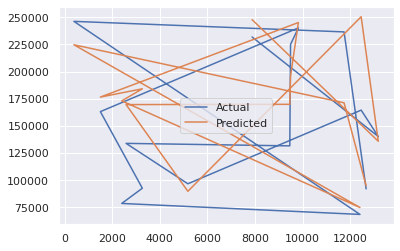

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred2" : y_predict2})
plt.plot(df[:15])
plt.legend(['Actual','Predicted'])

In [ ]:
reg_score = r2_score(y_test , y_predict2)
print('R squared of ride regression :',reg_score)

p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
print('Adjacent R squared of ride regression : ',adj_R2)

mape = mean_absolute_percentage_error(y_test , y_predict2)
print("Mean  absolute precentage error of ride regression : ",mape*100,'%')

R squared of ride regression : 0.47922029738019056
Adjacent R squared of ride regression :  0.47887782936005474
Mean  absolute precentage error of ride regression :  33.72425786132363 %


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
